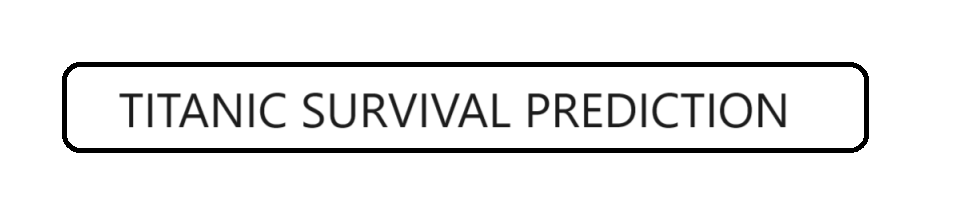

### Importing necessary libraries

In [1]:
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
titanic_df = pd.read_csv('Titanic.csv')

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


- we have to handle all the null values & object columns 

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Removing irrelevant columns

In [6]:
titanic_df.drop(['Cabin','Fare','Ticket','Name'],axis=1,inplace=True)

In [7]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,0,3,male,34.5,0,0,Q
1,893,1,3,female,47.0,1,0,S
2,894,0,2,male,62.0,0,0,Q
3,895,0,3,male,27.0,0,0,S
4,896,1,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,S
414,1306,1,1,female,39.0,0,0,C
415,1307,0,3,male,38.5,0,0,S
416,1308,0,3,male,NaN,0,0,S


### Data Preprocessing

#### Finding null values

In [8]:
titanic_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

- only age column has null values 

In [9]:
titanic_df.isnull().sum()/len(titanic_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Embarked        0.000000
dtype: float64

- Age column missing values are <25%. so imputation needed to fill missing values

<AxesSubplot:xlabel='Age'>

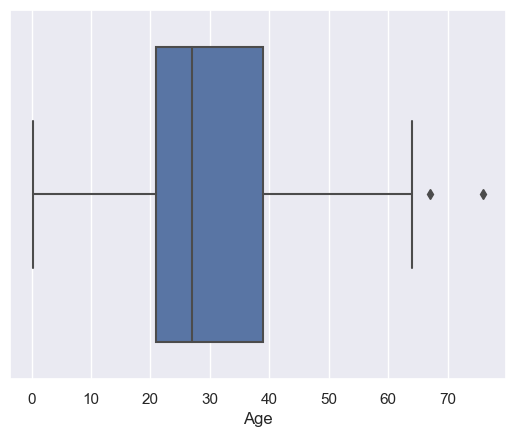

In [10]:
sns.boxplot(titanic_df['Age'])

- As there are out liers in age column, we have to fill missing values with median

### Imputation

In [11]:
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())

In [12]:
titanic_df.isnull().sum()/len(titanic_df)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Embarked       0.0
dtype: float64

- filled null values 

### Encoding 

- We have 2 object datatype columns (Sex & Embarked) needs to be encoded

In [13]:
titanic_df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

- We have only 2 unique values, we will go with label encoding

In [14]:
titanic_df['Sex']=titanic_df['Sex'].astype('category')
titanic_df['Sex']=titanic_df['Sex'].cat.codes

In [15]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,0,3,1,34.5,0,0,Q
1,893,1,3,0,47.0,1,0,S
2,894,0,2,1,62.0,0,0,Q
3,895,0,3,1,27.0,0,0,S
4,896,1,3,0,22.0,1,1,S
...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,S
414,1306,1,1,0,39.0,0,0,C
415,1307,0,3,1,38.5,0,0,S
416,1308,0,3,1,27.0,0,0,S


In [16]:
titanic_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

- we have 3 unique values, we will go with OneHotEncoding 

In [17]:
  titanic_df=pd.get_dummies(data=titanic_df,columns=['Embarked'])

In [18]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,1,34.5,0,0,0,1,0
1,893,1,3,0,47.0,1,0,0,0,1
2,894,0,2,1,62.0,0,0,0,1,0
3,895,0,3,1,27.0,0,0,0,0,1
4,896,1,3,0,22.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,0,0,1
414,1306,1,1,0,39.0,0,0,1,0,0
415,1307,0,3,1,38.5,0,0,0,0,1
416,1308,0,3,1,27.0,0,0,0,0,1


- we can remove one of the 3 columns 

In [19]:
titanic_df.drop('Embarked_C',axis=1,inplace=True)

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Embarked_Q   418 non-null    uint8  
 8   Embarked_S   418 non-null    uint8  
dtypes: float64(1), int64(5), int8(1), uint8(2)
memory usage: 20.9 KB


- Now we have all numeric data type columns

### Finding Outliers

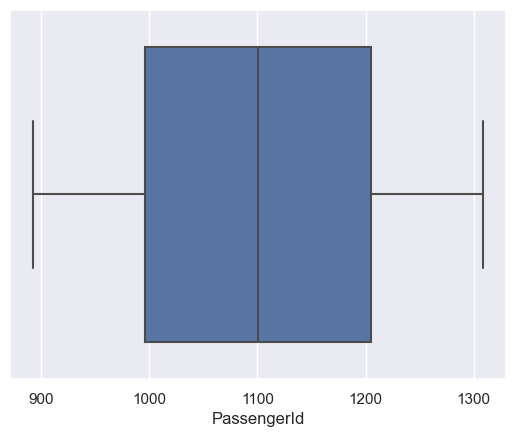

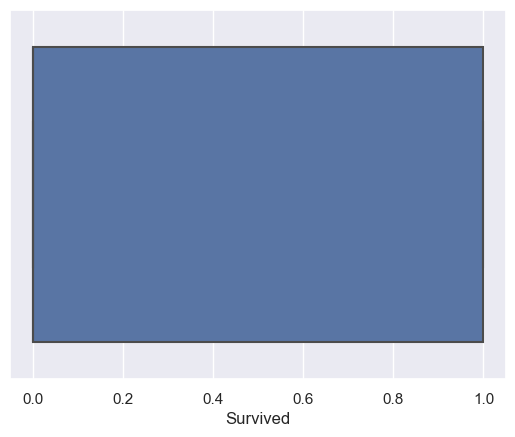

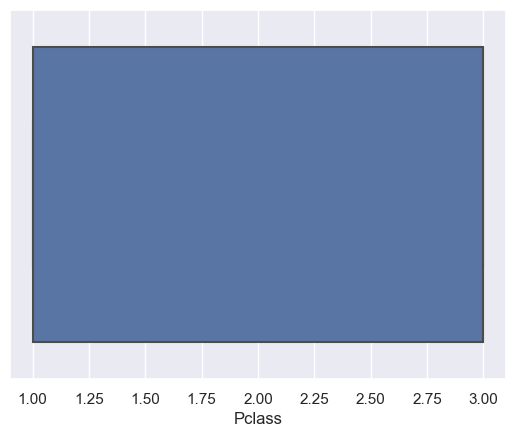

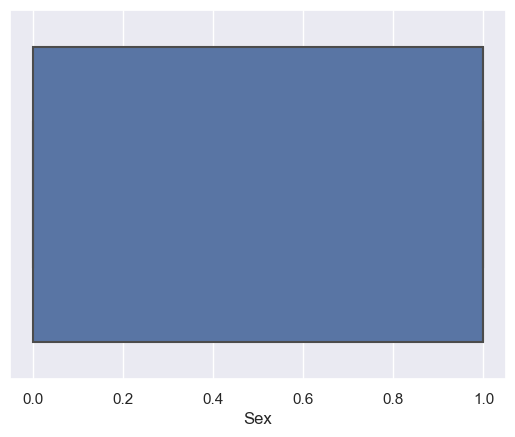

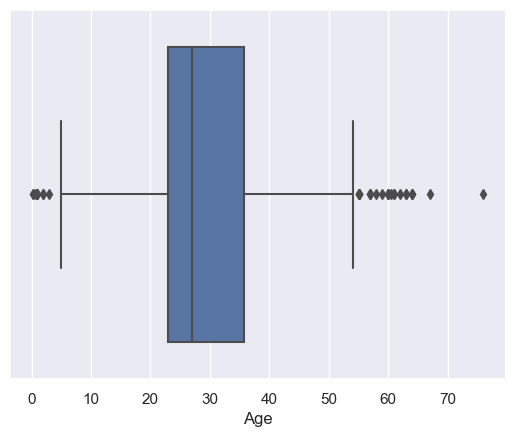

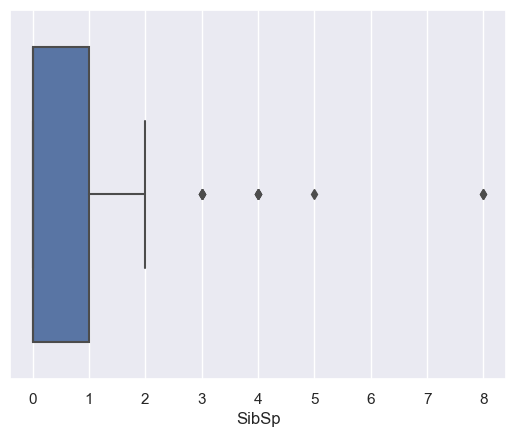

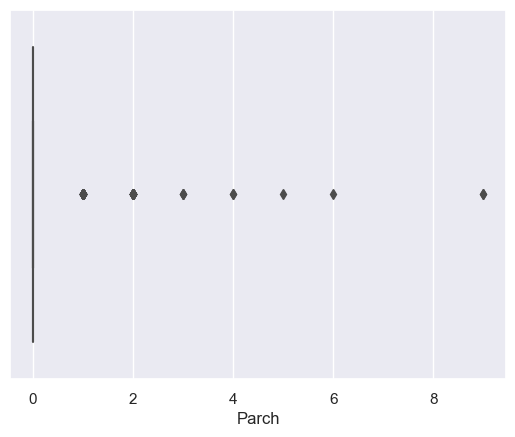

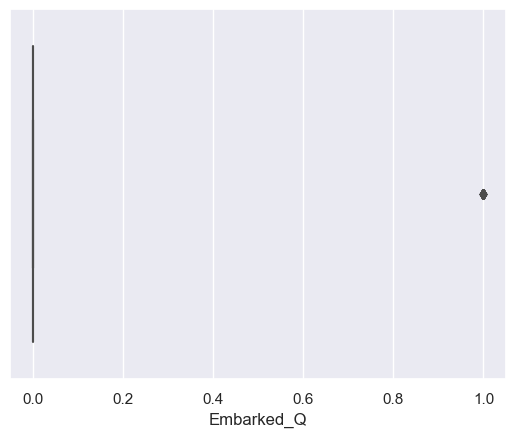

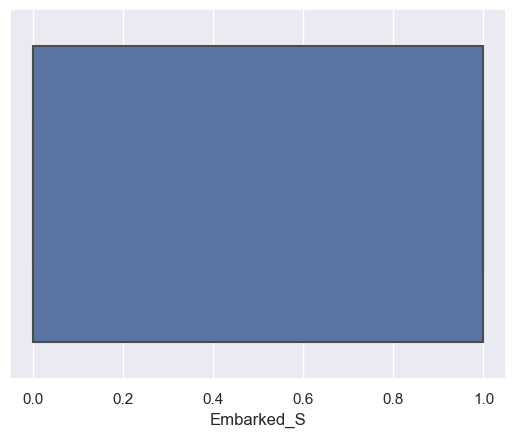

In [21]:
def outliers(col):
    sns.boxplot(titanic_df[col])
    plt.show()




for i in titanic_df.columns:
    outliers(i)

- We have outliers in few columns, which are required to differentiate DV outcomes

### Balancing the data

In [22]:
titanic_df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

- from above we can see max not more than 2times of min. we can conclude data is balanced

### Splitting data into DV & IDV

In [23]:
x=titanic_df.drop('Survived',axis=1)
y=titanic_df[['Survived']]

In [24]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,1,0
1,893,3,0,47.0,1,0,0,1
2,894,2,1,62.0,0,0,1,0
3,895,3,1,27.0,0,0,0,1
4,896,3,0,22.0,1,1,0,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,0,1
414,1306,1,0,39.0,0,0,0,0
415,1307,3,1,38.5,0,0,0,1
416,1308,3,1,27.0,0,0,0,1


In [25]:
y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


### Splitting data into train & test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20,stratify=y)

In [28]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
92,984,1,0,27.0,1,2,0,1
185,1077,2,1,40.0,0,0,0,1
306,1198,1,1,30.0,1,2,0,1
405,1297,2,1,20.0,0,0,0,0
365,1257,3,0,27.0,1,9,0,1
...,...,...,...,...,...,...,...,...
390,1282,1,1,23.0,0,0,0,1
257,1149,3,1,28.0,0,0,0,1
6,898,3,0,30.0,0,0,1,0
35,927,3,1,18.5,0,0,0,0


In [29]:
x_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
246,1138,2,0,22.0,0,0,0,1
177,1069,1,1,54.0,1,0,0,0
358,1250,3,1,27.0,0,0,1,0
392,1284,3,1,13.0,0,2,0,1
101,993,2,1,27.0,1,0,0,1
...,...,...,...,...,...,...,...,...
347,1239,3,0,38.0,0,0,0,0
130,1022,3,1,32.0,0,0,0,1
260,1152,3,1,36.5,1,0,0,1
210,1102,3,1,32.0,0,0,0,1


In [30]:
y_train

,Survived
92,1
185,0
306,0
405,0
365,1
...,...
390,0
257,0
6,1
35,0


In [31]:
y_test

,Survived
246,1
177,0
358,0
392,0
101,0
...,...
347,1
130,0
260,0
210,0


## Model Building

In [32]:
!pip install Xgboost

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [35]:
#logistic
logit=LogisticRegression()

In [36]:
#DecisionTree
dtree=DecisionTreeClassifier()

In [37]:
#Bagging
bagg=BaggingClassifier()

In [38]:
#Randomforest
rf=RandomForestClassifier()

In [40]:
#Boosting
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [41]:
#NAIVEBAYES
gnb=GaussianNB()
bnb=BernoulliNB()

In [42]:
#K nearest neighbor
knn=KNeighborsClassifier()

In [43]:
#SVM
svm=SVC()

In [44]:
list1=[(logit,'logistic',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gb,'GradientBoost',5),(xgb,'XGBoost',6),(gnb,'GradientNB',7),(bnb,'BernoulliNB',8),(knn,'KNN',9),(svm,'SVM',10)]

In [48]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('#'*75)
    print(f'Cross validation of {model_name}')
    Train_cvs=cross_val_score(model,x_train,y_train,cv=10).mean()
    Test_cvs=cross_val_score(model,x_test,y_test,cv=10).mean()
    variance=abs(Train_cvs-Test_cvs)
    print('Train cvs:',Train_cvs)
    print('Test cvs:',Test_cvs)
    print('variance:',variance)
    if variance>0.1 :
        print(f'Overfitting {model_name}')   

###########################################################################
Cross validation of logistic
Train cvs: 1.0
Test cvs: 0.990909090909091
variance: 0.009090909090909038
###########################################################################
Cross validation of decisiontree
Train cvs: 1.0
Test cvs: 1.0
variance: 0.0
###########################################################################
Cross validation of bagging
Train cvs: 1.0
Test cvs: 1.0
variance: 0.0
###########################################################################
Cross validation of randomforest
Train cvs: 1.0
Test cvs: 1.0
variance: 0.0
###########################################################################
Cross validation of GradientBoost
Train cvs: 1.0
Test cvs: 1.0
variance: 0.0
###########################################################################
Cross validation of XGBoost
Train cvs: 1.0
Test cvs: 1.0
variance: 0.0
######################################################################

In [49]:
#classification report
from sklearn.metrics import classification_report
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('#'*75)
    print(f'Classification report of {model_name}')
    print('='*75)
    Train_cfr=classification_report(y_train,y_pred_train)
    Test_cfr=classification_report(y_test,y_pred_test)
    print('Train classification report:',Train_cfr)
    print('Test classification report:',Test_cfr)

###########################################################################
Classification report of logistic
Train classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       114

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313

Test classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        38

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

###########################################################################
Classification report of decisiontree
Train classification report:               precision    recall  f

Confusion matrix of logistic


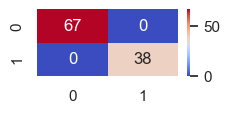

Confusion matrix of decisiontree


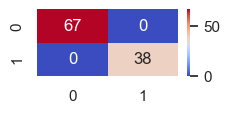

Confusion matrix of bagging


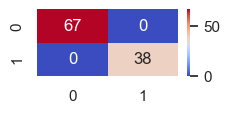

Confusion matrix of randomforest


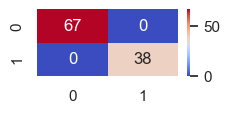

Confusion matrix of GradientBoost


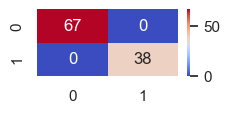

Confusion matrix of XGBoost


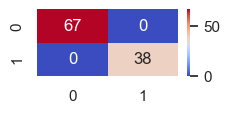

Confusion matrix of GradientNB


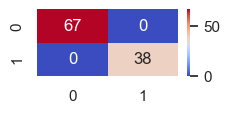

Confusion matrix of BernoulliNB


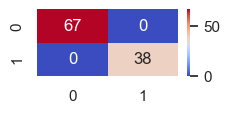

Confusion matrix of KNN


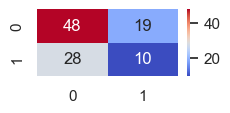

Confusion matrix of SVM


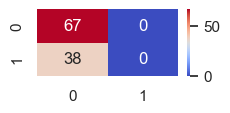

In [50]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred_test)
    print(f'Confusion matrix of {model_name}')
    plt.figure(figsize=(5,5))
    plt.subplot(5,2,i)
    sns.heatmap(cm,annot=True,cmap='coolwarm')
    plt.show()

In [51]:
#Accuracy_Score
from sklearn.metrics import accuracy_score
accuracy_list=[]
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=accuracy_score(y_test,y_pred_test)
    accuracy_list.append(test_acc)

In [52]:
accuracy_list

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5523809523809524, 0.638095238095238]

In [55]:
model=['logistic','decisiontree','bagging','randomforest','GradientBoost','XGBoost','GaussianNB','BernoulliNB','KNN','SVM']

In [56]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':accuracy_list})

In [57]:
metrics_df

,model_name,Accuracy
0,logistic,1.000000
1,decisiontree,1.000000
2,bagging,1.000000
3,randomforest,1.000000
4,GradientBoost,1.000000
5,XGBoost,1.000000
6,GaussianNB,1.000000
7,BernoulliNB,1.000000
8,KNN,0.552381
9,SVM,0.638095


## Summary

### We can observe that all models predicted and gave best accuracy among all of them RandomForest gave best train accuracy of 99% and test accuracy of 99% with 'NO VARIANCE'
### BEST MODEL:LOGISTIC,DECISION TREE, BAGGING CLASSIFIER, RANDOM FOREST CLASSIFER,GRADIENT BOOST CLASSIFIER,XGBOOST CLASSIFER,GAUSSIAN NB,BERNOULLI NB